In [1]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snst
from tslearn.datasets import UCR_UEA_datasets
import tensorflow as tf 

2022-11-24 10:34:11.626653: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 10:34:11.626666: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Parameters

In [2]:
dataset='Coffee'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)


In [4]:
enc1=pickle.load(open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

FileNotFoundError: [Errno 2] No such file or directory: '../../ClassificationModels/models/Coffee/OneHotEncoder.pkl'

# Model Training

In [5]:
import tensorflow as tf 


#model = Classifier_CNN(f'./ClassificationModels/models/{dataset}', (train_x.shape[1], train_x.shape[2]), train_y.shape[-1], True)
#y_true = np.argmax(test_y, axis=1)
#model.fit(train_x,train_y,test_x,test_y)

model_to_explain = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/last_model.hdf5')

2022-11-24 10:34:52.780227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-24 10:34:52.780244: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 10:34:52.780257: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jacqueline-ThinkPad-P53): /proc/driver/nvidia/version does not exist
2022-11-24 10:34:52.780375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Explanation Algo

In [6]:
from TSInterpret.InterpretabilityModels.Saliency.TSR import TSR
int_mod=TSR(model_to_explain, train_x.shape[-2],train_x.shape[-1], method='IG',mode='time')

Mode in TF Saliency time


In [7]:
print(np.array([test_x[0,:,:]]).shape)

(1, 286, 1)


In [8]:
item= np.array([test_x[0,:,:]])
label=int(np.argmax(test_y[0]))


In [9]:
exp=int_mod.explain(item,labels=label,TSR =True)

# Plot Item 

time mode


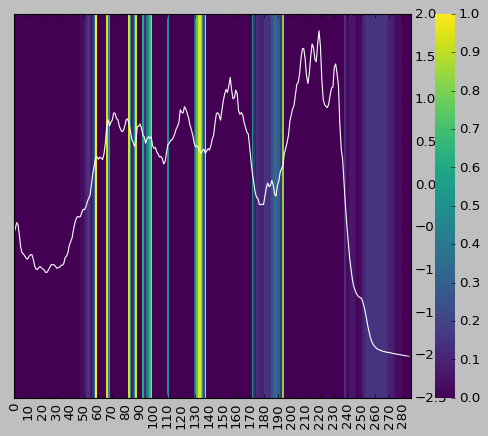

In [10]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp)

time mode


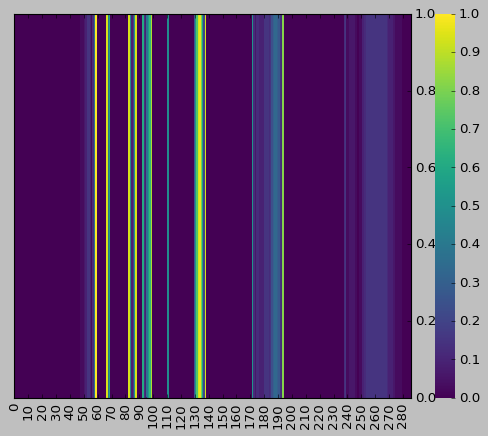

In [11]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp, heatmap = True)